In [6]:
import numpy as np
import pandas as pd
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_learning_curves
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

x_train_original = pd.read_csv("../data/COMP30027_2021_Project2_datasets/recipe_train.csv", index_col = False, delimiter = ',', header=0)
oversample = RandomOverSampler(sampling_strategy='majority')


# First random oversampling, bring count of class 3 to be equal to the highest class count.
X_oversampled, y_oversampled = oversample.fit_resample(x_train_original, x_train_original.loc[:,'duration_label'])


# Second random oversampling, bring the count of class 2 to be equal to the other 2 classes
X_oversampled, y_oversampled = oversample.fit_resample(X_oversampled, y_oversampled)

# .value_counts()
# use recipe name as an example
train_corpus = X_oversampled.loc[:,['name','steps','ingredients']]
train_corpus





ValueError: 'sampling_strategy'='majority' cannot be used with over-sampler.

In [32]:



train_corpus['steps'] = train_corpus['steps'].apply(eval)
train_corpus['ingredients'] = train_corpus['ingredients'].apply(eval)
train_corpus['steps'] = train_corpus['steps'].apply(' '.join)
train_corpus['ingredients'] = train_corpus['ingredients'].apply(' '.join)

# vectorizer = CountVectorizer()
# X = vectorizer.fit_transform(corpus)

In [33]:

all_words = []

for i in range (0, len(train_corpus['steps'])):
    s = ''
    s += train_corpus.loc[i,'name'] + train_corpus.loc[i, 'steps'] + train_corpus.loc[i, 'ingredients']
    all_words.append(s)
    
# all_words = pd.DataFrame(all_words)

In [73]:
from sklearn.feature_extraction.text import CountVectorizer
# stop_word ='english' means deleting some common words like the, a,.... in list 'english'



vectorizer = CountVectorizer(stop_words='english', max_features = 2000)
X = vectorizer.fit(all_words)
vocab_dict = vectorizer.vocabulary_
# vocab = np.array(vectorizer.get_feature_names())

X_final = vectorizer.transform(all_words)
X_final.shape

(60738, 2000)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_oversampled, test_size=0.2, stratify=y_oversampled, random_state=42)

In [36]:
from sklearn import svm

LinearSVC_clf = svm.LinearSVC(dual=False, multi_class='ovr', random_state=0)

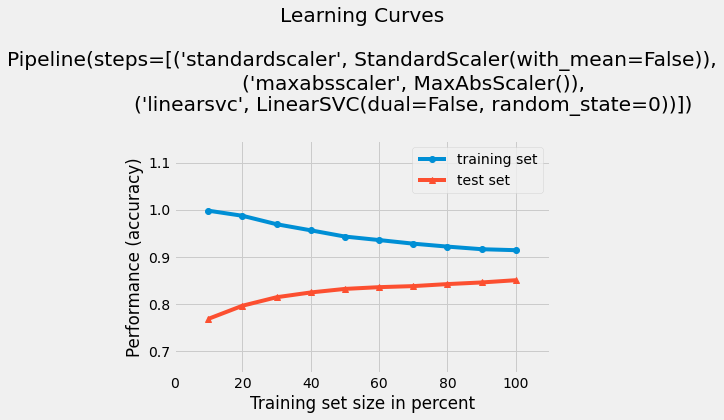

In [37]:
SVC_clf = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(), LinearSVC_clf)
plot_learning_curves(X_train, y_train, X_test, y_test, SVC_clf, scoring= 'accuracy')
plt.show()

In [38]:

SVC_clf.fit(X_train, y_train)

y_test_predict = SVC_clf.predict(X_test)
y_train_predict = SVC_clf.predict(X_train)
print(accuracy_score(y_test, y_test_predict))
print(accuracy_score(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))
cm = confusion_matrix(y_test, y_test_predict)
cm

0.8506750082318077
0.9142416135007203
              precision    recall  f1-score   support

         1.0       0.78      0.82      0.80      4049
         2.0       0.82      0.74      0.78      4049
         3.0       0.95      0.99      0.97      4050

    accuracy                           0.85     12148
   macro avg       0.85      0.85      0.85     12148
weighted avg       0.85      0.85      0.85     12148



array([[3308,  644,   97],
       [ 926, 2998,  125],
       [  18,    4, 4028]], dtype=int64)

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf = TfidfVectorizer(stop_words='english', max_features = 1000)
X = tf_idf.fit(all_words)
vocab_tfidf = X.vocabulary_
# vocab = np.array(vectorizer.get_feature_names())

X_tfidf = tf_idf.transform(all_words)
# y_oversampled.shape
X_tfidf.shape

(60738, 5000)

In [67]:

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_tfidf, y_oversampled, test_size=0.2, stratify=y_oversampled, random_state=42)
LinearSVC_clf_tfidf = svm.LinearSVC(dual=False, multi_class='ovr', random_state=0)

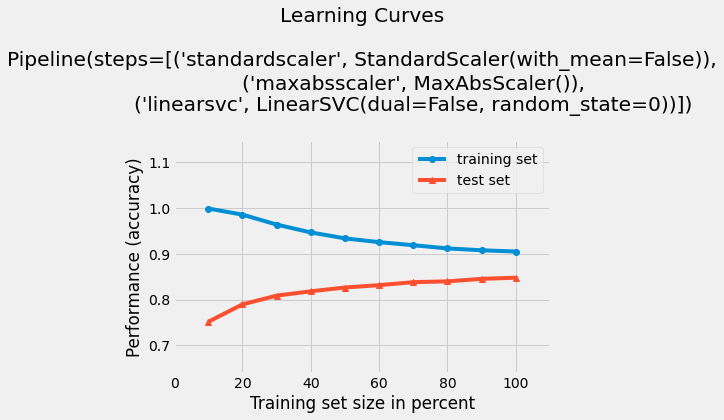

In [68]:
SVC_clf_tfidf = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(), LinearSVC_clf_tfidf)
plot_learning_curves(X_train2, y_train2, X_test2, y_test2, SVC_clf_tfidf, scoring= 'accuracy')
plt.show()

In [69]:
SVC_clf_tfidf.fit(X_train2, y_train2)

y_test_predict2 = SVC_clf_tfidf.predict(X_test2)
y_train_predict2 = SVC_clf_tfidf.predict(X_train2)
print(accuracy_score(y_test2, y_test_predict2))
print(accuracy_score(y_train2, y_train_predict2))
print(classification_report(y_test2, y_test_predict2))
cm = confusion_matrix(y_test2, y_test_predict2)
cm

0.8478761936121172
0.9050833504836386
              precision    recall  f1-score   support

         1.0       0.78      0.81      0.80      4049
         2.0       0.82      0.74      0.78      4049
         3.0       0.94      0.99      0.97      4050

    accuracy                           0.85     12148
   macro avg       0.85      0.85      0.85     12148
weighted avg       0.85      0.85      0.85     12148



array([[3279,  660,  110],
       [ 910, 2998,  141],
       [   7,   20, 4023]], dtype=int64)

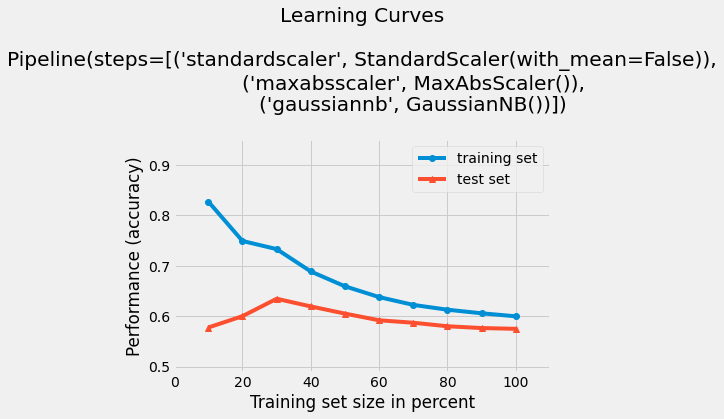

In [74]:
from sklearn.naive_bayes import GaussianNB


GNB = GaussianNB()
GNB_clf = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(), GNB)
plot_learning_curves(X_train2.toarray(), y_train2, X_test2.toarray(), y_test2, GNB_clf, scoring= 'accuracy')
plt.show()


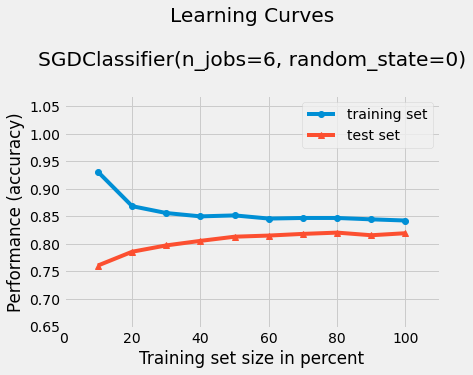

In [15]:
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(max_iter=1000, tol=1e-3, n_jobs=6, random_state=0)
plot_learning_curves(X_train, y_train, X_test, y_test, clf_SGD, scoring= 'accuracy')
plt.show()

In [39]:
SGD = make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(),clf_SGD)
SGD.fit(X_train, y_train)

y_test_predict_SGD = SGD.predict(X_test)
y_train_predict_SGD = SGD.predict(X_train)
print(accuracy_score(y_test, y_test_predict_SGD))
print(accuracy_score(y_train, y_train_predict_SGD))
print(classification_report(y_test, y_test_predict_SGD))
cm = confusion_matrix(y_test, y_test_predict_SGD)
cm
X_train.shape

0.850592690154758
0.8848528503807368
              precision    recall  f1-score   support

         1.0       0.79      0.83      0.81      4049
         2.0       0.84      0.74      0.79      4049
         3.0       0.92      0.98      0.95      4050

    accuracy                           0.85     12148
   macro avg       0.85      0.85      0.85     12148
weighted avg       0.85      0.85      0.85     12148



(48590, 6000)

In [76]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


estimators = [
     ('CountVecSVC', make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(), LinearSVC_clf)),
     ('SGD', make_pipeline(StandardScaler(with_mean=False), MaxAbsScaler(),clf_SGD))]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression(n_jobs=6, random_state=0), n_jobs=6)

stacking_clf.fit(X_train, y_train)


y_test_predict_stack = stacking_clf.predict(X_test)
y_train_predict_stack = stacking_clf.predict(X_train)
print(accuracy_score(y_test, y_test_predict_stack))
print(accuracy_score(y_train, y_train_predict_stack))
print(classification_report(y_test, y_test_predict_stack))
cm = confusion_matrix(y_test, y_test_predict_stack)
cm


0.8458182416858743
0.8694793167318379
              precision    recall  f1-score   support

         1.0       0.77      0.83      0.80      4049
         2.0       0.84      0.74      0.78      4049
         3.0       0.93      0.97      0.95      4050

    accuracy                           0.85     12148
   macro avg       0.85      0.85      0.84     12148
weighted avg       0.85      0.85      0.84     12148



array([[3370,  536,  143],
       [ 895, 2993,  161],
       [  90,   48, 3912]], dtype=int64)

In [78]:
import scipy
final_test = scipy.sparse.load_npz('CountVec.npz')

# stacking_clf.fit(X_train, y_train)
real_test_pred = stacking_clf.predict(final_test)
real_test_pred
# final_test.shape



array([3., 2., 1., ..., 1., 1., 3.])

In [79]:
a = [x for x in range(1,10001)]

result = {
    'id': a,
    'duration_label': real_test_pred
}
result = pd.DataFrame(result)
result.to_csv('result.csv', index = False)